In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\USER\Downloads\household_power_consumption\household_power_consumption.txt",delimiter=';', low_memory=False, header=0, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'], na_values='?')

In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df.shape

(2075259, 7)

In [5]:
df.replace("?", np.nan, inplace=True)

In [6]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
df = df.fillna(df.mean())
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

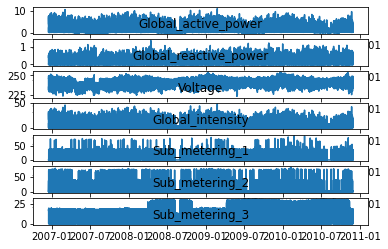

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    name = df.columns[i]
    plt.plot(df[name])
    plt.title(name, y=0)
plt.show()
plt.figure(figsize=(10,6))

<ipython-input-9-a75009703b54>:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  result = df[str(year)]


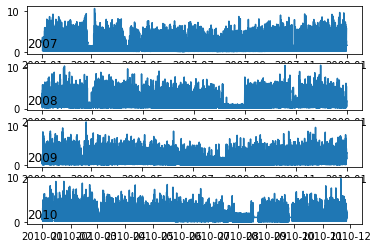

In [9]:
years = ['2007','2008','2009','2010']
plt.figure()
for i in range(len(years)):
    ax = plt.subplot(len(years), 1, i+1)
    year = years[i]
    result = df[str(year)]
    plt.plot(result['Global_active_power'])
    plt.title(str(year), y=0, loc='left')
plt.show()


<ipython-input-10-37b5befba15a>:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  result = df[month]


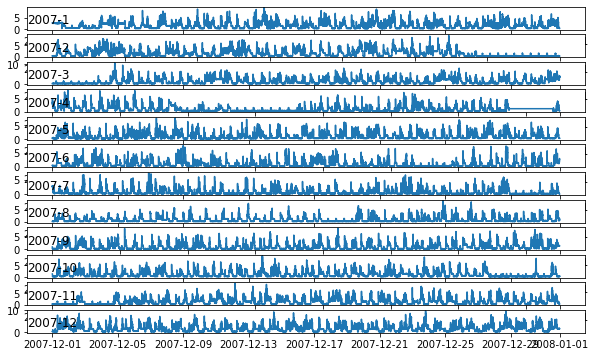

<Figure size 432x288 with 0 Axes>

In [10]:
months = [x for x in range(1, 13)]
plt.figure(figsize=(10,6))
for i in range(len(months)):
    ax = plt.subplot(len(months), 1, i+1)
    month= '2007-' + str(months[i])
    result = df[month]
    plt.plot(result['Global_active_power'])
    plt.title(month, y=0, loc='left')
plt.show()
plt.tight_layout()

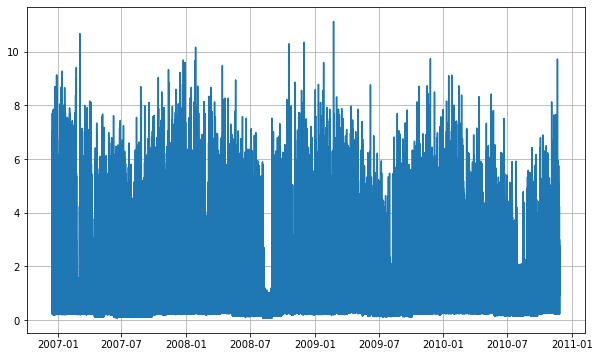

In [11]:
plt.figure(figsize=(10,6))
plt.plot(df.Global_active_power)
plt.grid()


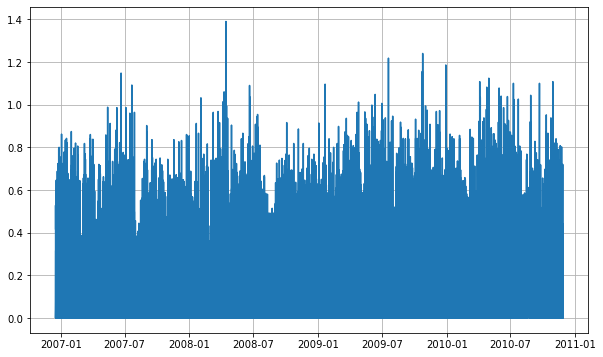

In [12]:
plt.figure(figsize=(10,6))
plt.plot(df.Global_reactive_power)
plt.grid()


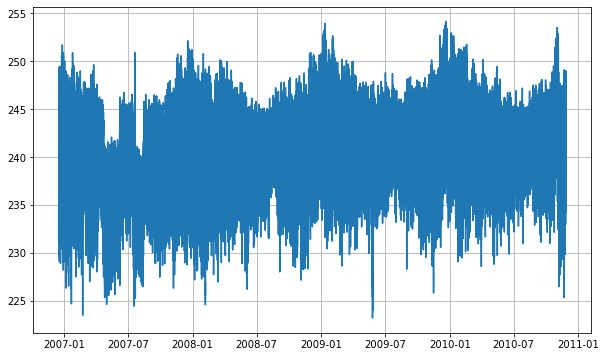

In [13]:
plt.figure(figsize=(10,6))
plt.plot(df.Voltage)
plt.grid()


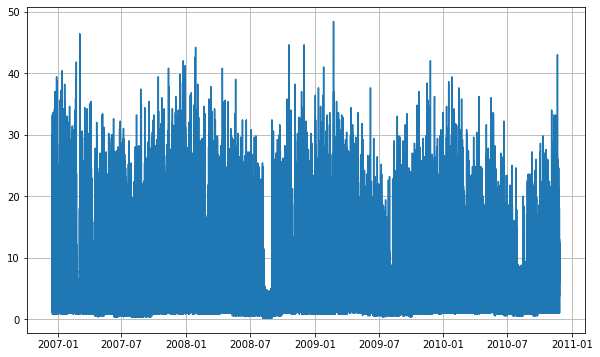

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df.Global_intensity)
plt.grid()

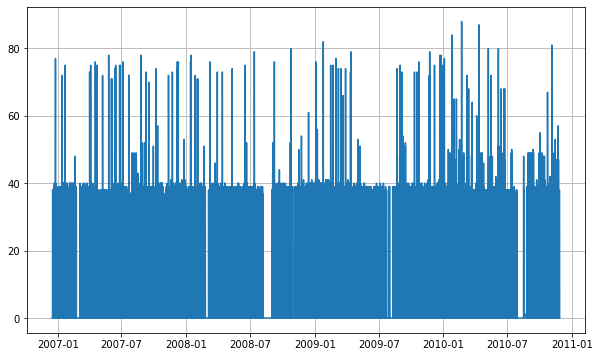

In [15]:
plt.figure(figsize=(10,6))
plt.plot(df.Sub_metering_1)
plt.grid()


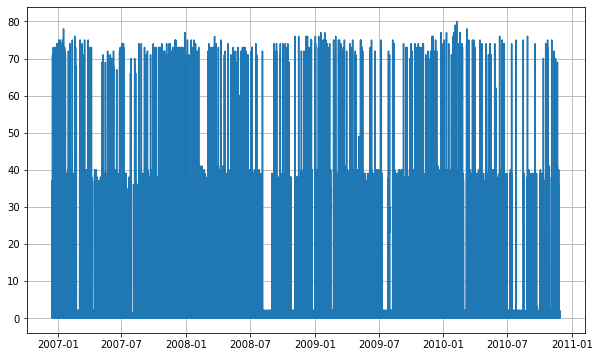

In [16]:
plt.figure(figsize=(10,6))
plt.plot(df.Sub_metering_2)
plt.grid()

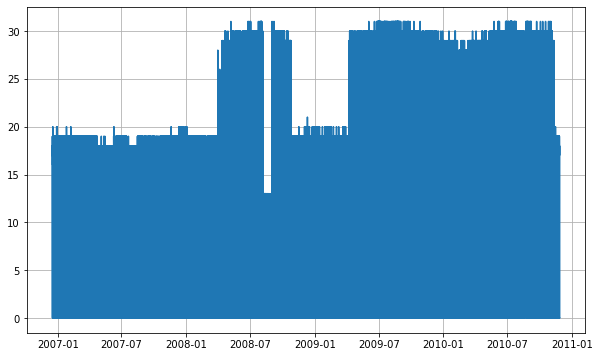

In [17]:
plt.figure(figsize=(10,6))
plt.plot(df.Sub_metering_3)
plt.grid()

In [18]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

<ipython-input-19-dd25b4d66d6d>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_series = sm.tsa.seasonal_decompose(df['Voltage'], model='additive', freq=(60*24*30))


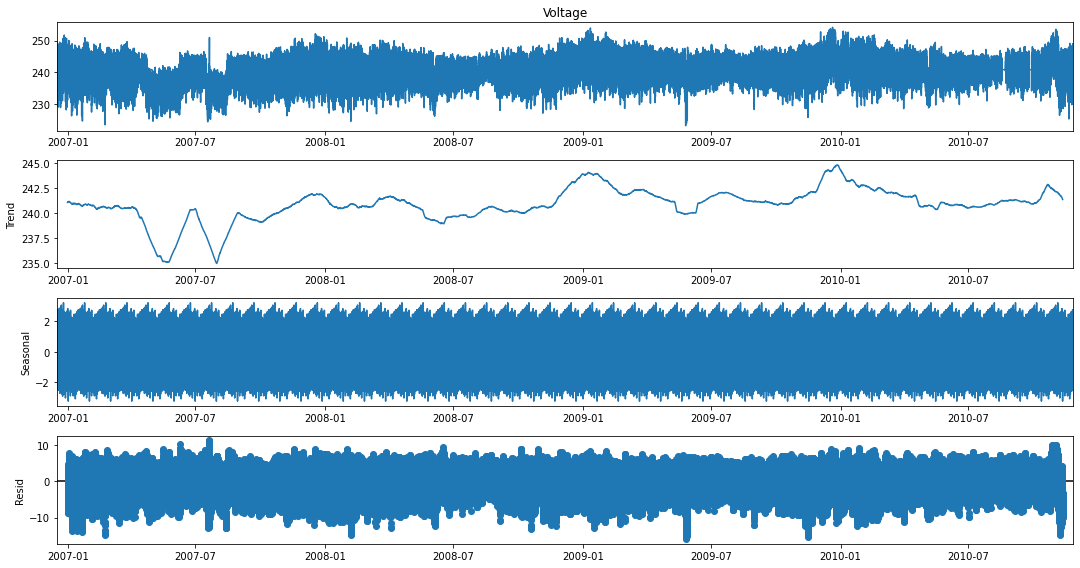

In [19]:
decompose_series = sm.tsa.seasonal_decompose(df['Voltage'], model='additive', freq=(60*24*30))
decompose_series.plot()
plt.show()

In [20]:
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [21]:
df_daily = df.resample('D').sum()
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [22]:
df_monthly = df.resample('M').mean()
df_monthly.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-31,1.901148,0.131384,241.441016,8.029338,1.248613,2.214821,7.409385
2007-01-31,1.546014,0.132676,240.905098,6.546829,1.264230,1.775909,7.383309
2007-02-28,1.401068,0.113637,240.519406,5.914505,1.180214,1.602346,6.703545
2007-03-31,1.318622,0.114747,240.513476,5.572958,1.361338,2.346848,6.504647
2007-04-30,0.908462,0.119203,239.524112,3.894800,1.070716,1.001190,4.943236


<ipython-input-23-c3bb9b4fd6fd>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], model='additive', freq= (60*24*30))


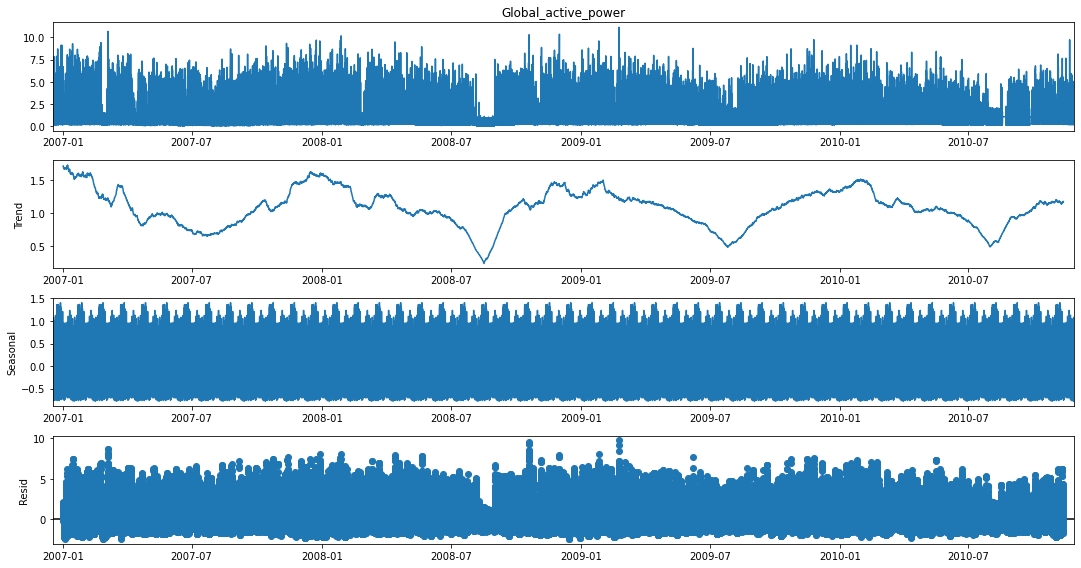

In [23]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 15,8
decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], model='additive', freq= (60*24*30))
decompose_series.plot()
plt.show()

In [24]:
!pip install --upgrade plotly

In [25]:
!pip install pystan
import pystan


In [26]:
from fbprophet import Prophet

In [27]:
df_daily.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0


In [28]:
df_daily2= df_daily.reset_index()
df_daily2.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [29]:
df_daily2 = df_daily2[['datetime','Global_active_power']]
new_daily_df= df_daily2.rename(columns={"datetime":"ds","Global_active_power":"y"})

In [ ]:
model_2 = Prophet()
model_2.fit(new_daily_df)
future = model_2.make_future_dataframe(periods=365, freq='D')
forecast2 = model_2.predict(future)
forecast2.head(5)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


KeyError: 'metric_file'

Exception ignored in: 'stanfit4anon_model_f5236004a3fd5b8429270d00efcc0cf9_9045703871880297330._set_stanargs_from_dict'
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\pystan\model.py", line 550, in optimizing
    ret, sample = fit._call_sampler(stan_args)
KeyError: 'metric_file'


In [ ]:
forecast2[['ds','yhat','yhat_lower','yhat_upper','trend','trend_lower','trend_upper']]

In [ ]:
model_2.plot(forecast2)
plt.show()


In [ ]:
plt.plot(df_daily.Global_active_power)
plt.show()

In [ ]:
df['Voltage'].corr(df['Global_active_power'])


In [ ]:
df['Global_active_power'].corr(df['Global_reactive_power'])

In [ ]:
df['Global_reactive_power'].corr(df['Global_active_power'])


In [ ]:
df_daily.shape

In [ ]:
df_GAP = df_daily2['Global_active_power']

In [ ]:
train_df = df_daily2.drop(df_daily2.index[-365:])
print(train_df.tail())

In [ ]:
df_daily2.tail(2)

In [ ]:
model = Prophet()
model.fit(new_train_df)

In [ ]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
y_true = df_daily2['Global_active_power'][-365:].values
y_pred = forecast['yhat'][-365:].values

In [ ]:
MAE = np.mean(np.abs((y_true - y_pred)/y_true))
MAE

In [ ]:
y_true.shape

In [ ]:
forecast['yhat'].tail()

In [ ]:
df_daily2['Global_active_power'].tail()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
round(rmse, 3)

In [ ]:
model.plot_components(forecast)